# **IMDBDataset of 50K Movie Reviews**

## **Natural Language Processing (NLP) & LSTM (Long Short-Term Memory)**

-------------------------------
## **Project Purpose** 
-------------------------------

The purpose of this project is to perform a sentiment analysis on 50,000 movie reviews from the IMDB Dataset. Movies rely on consumers' sentiments to drive engagement through viewership and ticket sales, merchandising, social media, and other revenue streams.

-------------------------------
## **About IMDB Dataset** 
-------------------------------
IMDB Dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

For more dataset information, please go through the following link:
http://ai.stanford.edu/~amaas/data/sentiment/

The dataset was pulled from Kaggle. The link is listed below:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

-------------------------------
## **About IMDB** 
-------------------------------

IMDb is the world's most popular and authoritative source for information on movies, TV shows, and celebrities. Hundreds of millions of customers all over the world rely on IMDb to discover and decide what to watch, advance their professional entertainment careers through IMDbPro, and grow their businesses using IMDb data and trending insights. Products and services to help fans discover and decide what to watch and where to watch it include: the IMDb website for desktop and mobile devices; apps for iOS and Android; and, X-Ray on Prime Video. For entertainment industry professionals, IMDb provides IMDbPro and Box Office Mojo. IMDb licenses information from its vast and authoritative database to third-party businesses worldwide; learn more at developer.imdb.com. IMDb is an Amazon company. For more information, visit https://www.imdb.com/press and follow @IMDb.

Information about IMDB was pulled from its website:
https://www.imdb.com/pressroom/about/

In [1]:
!pip install kaggle

In [2]:
!pip install kagglehub

In [54]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.8/284.8 kB 12.6 MB/s eta 0:00:00


# **Import Libraries and Authentication**

In [3]:
#Authentication for Kaggle using Credentials
import kagglehub

kagglehub.login()

In [4]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /Users/talibahtimothy/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [24]:
#Import Libraries
#import warnings: manage warning messages that may appear during code execution 
#warnings.filterwarnings('ignore'): suppress all warnings — they won't be printed to the console
#import os: rovides functions for interacting with the operating system
#dir_Path = 'F:\\': F: drive,(\\) are used to escape the backslash character in strings 
#import pandas as pd:data analysis and manipulation
#import numpy as np: numerical computing:rrays, math operations, and data manipulation
#from sklearn.preprocessing import LabelEncoder: convert categorical labels (e.g., 'positive', 'negative') into numbers (e.g., 1 and 0).Machine learning models usually need numeric input
#from sklearn.feature_extraction.text import TfidfVectorizer: TF-IDF (Term Frequency–Inverse Document Frequency) to reflect how important a word is to a document in a collection
#from sklearn.ensemble import RandomForestClassifier: ensemble of decision trees:flexible model for classification tasks.
#from sklearn.svm import LinearSVC: linear Support Vector Classifier, a version of Support Vector Machine (SVM) optimized for speed.When using high-dimensional data like TF-IDF vectors
#from sklearn.neighbors import KNeighborsClassifier: K-Nearest Neighbors (KNN):classifies a data point based on the majority class of its k nearest neighbors in the feature space. 
#from sklearn.metrics import accuracy_score , classification_report: accuracy_score: Measures the proportion of correct predictions.classification_report: Gives a detailed summary of precision, recall, f1-score, and support for each class.
#from sklearn.model_selection import train_test_split: helps evaluate your model’s performance on unseen data
#from tensorflow.keras.models import Sequential: building neural networks, model layer by layer in linear stack
#from tensorflow.keras.layers import Dense, Embedding, LSTM: dense:fully connected network layer,embedding:convert integer encoded words into dense vectors (nlp)
#lstm:type of recurrent neural network(RNN) that is good for sequential data like text or time series
#from tensorflow.keras.preprocessing.text import Tokenizer:turning words/tokens into integers
#from tensorflow.keras.preprocessing.sequence import pad_sequences: all lists of token IDs are the same length
#import matplotlib.pyplot as plt: creates plots like line plots, bar graphs, and histograms
#import seaborn as sns:statistical data visualization library built. High-level functions for attractive and informative plots 
#%matplotlib inline: plots appear inside the notebook, right below the code cells
#sns.set_style("whitegrid"): white background with grid lines, making it ideal for plots involving numerical comparisons (like bar charts or line graphs)
#plt.style.use("fivethirtyeight"):mimic the style used by FiveThirtyEight, a popular data journalism website. Plots a clean, modern look with large fonts, minimal borders, and distinctive colors.

import warnings 
warnings.filterwarnings('ignore') 

import os 
dir_Path = 'F:\\'  

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score , classification_report 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding, LSTM 


from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

IMDB_data = pd.read_csv("Downloads/IMDB_Dataset.csv")

In [6]:
#Dataframe, first 5 rows
IMDB_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Data Cleaning**

In [39]:
#Check for any missing data in the dataset
print("Any missing value?",IMDB_data.isnull().values.any())

Any missing value? False


In [42]:
#Look at the total missing data in the dataset
IMDB_data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [44]:
#Drop missing values. There are no missing values, so the data is accurate.
IMDB_data.dropna(axis=0)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [46]:
#Find duplicates in the dataset
dup_IMDB_data=IMDB_data.duplicated().any()

In [47]:
#There duplicates in the dataset
print("Are there any duplicat values?",dup_IMDB_data)
#IMDB_data.drop_duplicates()
#IMDB_data.head()

Are there any duplicat values? True


# **Data Statistics**

In [7]:
#Shape of the dataset: columns, then rows
IMDB_data.shape

(50000, 2)

In [8]:
#Information about the dataset
IMDB_data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [9]:
#Data Statistics, transposing rows and columns
IMDB_data.describe().transpose()

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [10]:
#Value Counts of positive and negative sentiments
IMDB_data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

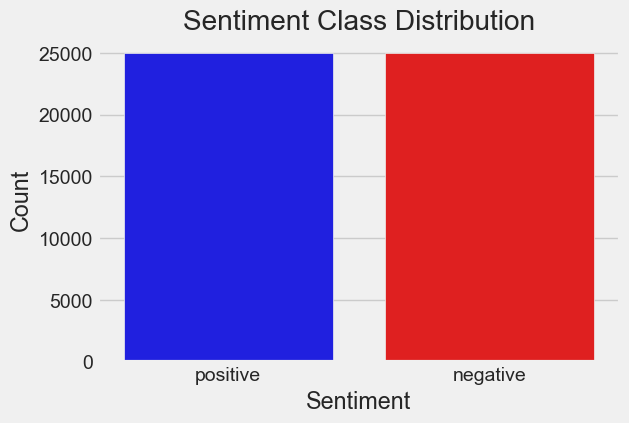

In [11]:
#Plot bar graph for sentiment: positive vs negative
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(6, 4))
sns.countplot(data=IMDB_data, x='sentiment',palette={'negative': 'red', 'positive': 'blue'})
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Percentage for default

sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


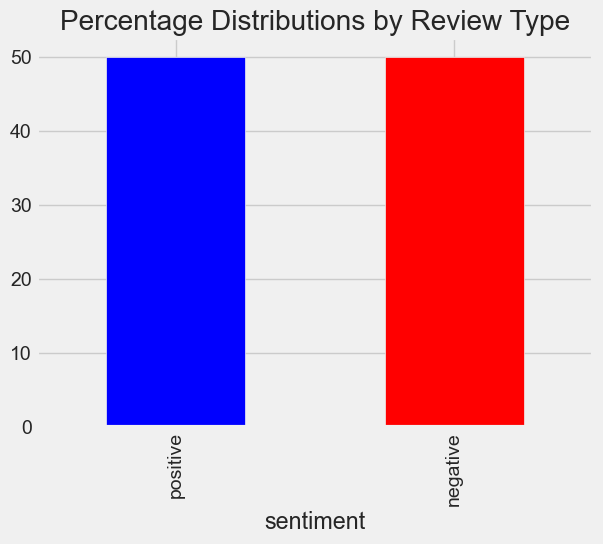

In [12]:
#Plot bar graph for sentiment: positive vs negative by percentage
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
percentages = round(IMDB_data.sentiment.value_counts(normalize=True)*100, 2)
print(percentages)

# Plot with custom colors for bars: 0 = negative (red), 1 = positive (blue)
percentages.plot(kind='bar', color=['red' if idx == 'negative' else 'blue' for idx in percentages.index])
plt.title('Percentage Distributions by Review Type')
plt.show()

# **Preprocessing & Lemmization**

In [57]:
#re: for regular expressions that allows you to match patterns in strings (used for text cleaning)
#string:common string operations (such as punctuation)
#nltk:Natural Language Toolkit, a popular library in Python for text processing and NLP
#nltk.corpus import stopwords:a list of common words like "the," "and," "in," etc., which don’t contribute much to meaning and can be removed
#nltk.stem import WordNetLemmatizer: a tool used for lemmatization, which reduces words to their base form (e.g., "running" becomes "run")
#nltk.download: the stopwords list and the WordNet database, which is needed for lemmatization
#set(stopwords.words('english')):loads a set of common English words to be removed from the text. These are words that usually don't carry significant meaning for NLP tasks.
#WordNetLemmatizer(): creates an instance of the WordNetLemmatizer which is used to reduce words to their base form (e.g., "better" becomes "good").
#text.lower():converts all the text to lowercase. I.e., "Apple" and "apple" are treated the same.
#re.sub(r'<.*?>', '', text):removes HTML tags.I.e: text contains HTML content like <p>...</p> tags
#re.sub(r'\d+', '', text): remove numbers.Numbers often don’t add much value in text analysis.
#text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation. I.e. commas, periods, etc.). Punctuation isn't useful intext classification tasks.
#text.split(): splits the text into a list of individual tokens (words)
#[lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]: lemmatize and remove stopwords
#.join(tokens):joins the list of processed words back into a single string, with a space separating each word

import re 
import string 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download needed resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/talibahtimothy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/talibahtimothy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
#Apply a function along a particular axis (in this case, on each entry of a column)
#Converting the text to lowercase.Removing HTML tags.Removing numbers.
#Removing punctuation.Lemmatizing words.Removing stopwords (commonly used words like "the," "is," etc.).

IMDB_data['cleaned_review'] = IMDB_data['review'].apply(preprocess_text)

In [59]:
#New dataframe with cleaned preprocessed review
IMDB_data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# **Encode Label**

In [63]:
#Replaces negative and positive in the sentiment column with numerical values 0 and 1.
#Binary Classification.
IMDB_data.replace({'sentiment' : {'positive':1, 'negative':0}}, inplace=True)
IMDB_data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...


# **Split the Data into Training and Testing Sets**

In [64]:
#Split data into training and test sets
train_IMDB_data, test_IMDB_data = train_test_split(IMDB_data, test_size=0.2, random_state=42)

In [65]:
#Shape of train and test sets
train_IMDB_data.shape, test_IMDB_data.shape

((40000, 3), (10000, 3))

In [66]:
#Tokenizerokenizer is a fundamental tool in NLP that breaks text into smaller units tokens.
#Example: Words ("Hello", "world").Punctuation ( "!", ".")
IMDB_tokenizer = Tokenizer(num_words=5000)
IMDB_tokenizer.fit_on_texts(train_IMDB_data['review'])
X_train = pad_sequences(IMDB_tokenizer.texts_to_sequences(train_IMDB_data['review']),maxlen = 200)
X_test = pad_sequences(IMDB_tokenizer.texts_to_sequences(test_IMDB_data['review']),maxlen = 200)

In [67]:
#Labels that extract the target variable ('sentient) from tow datasets.
#The two datasets are train_IMDB_data,test_IMDB_data.
y_train = train_IMDB_data['sentiment']
y_test = test_IMDB_data['sentiment']

# **Building & Training LSTM (Long Short-Term Memory) Model**

In [18]:
# Build the model and add 3 layers.
# Embedding, LSTM, Dense are the 3 layers. 
#Sigmoid is used to map predicted values to probabilities in binary classification. 
#Sigmoid cont.:Out layer for neural networks.
model0 = Sequential() #build a model layer-by-layer in a straightforward way. Add layers one at a time, and each layer’s output becomes the input for the next.
model0.add(Embedding(input_dim=5000, output_dim=125, input_length=200))
model0.add(LSTM(125, dropout=0.2,recurrent_dropout=0.2))
model0.add(Dense(1, activation='sigmoid'))

In [68]:
# Compile the model
#optimizer='adam': algorithim that adjusts the learning rate during training. Fast & stable.
#binary-crossentrypy: binary task. EX: positive:(1) vs negative:(0). Loss is high, if it predicts further away from the true label.
#metrics=['accuracy']:rpeorts it duing training and evaluation. Proportion of correctly predicted labels.

model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
#Model Training
#X_train:input features(padded sequences of tokeized reviews)
#y_train:labels (1=positive, 0=negative)
#epochs=5:go through the training dataset 5 times.
#batch_sizes=64:batches of 64 samples. Balances training speed and memory usage.
#validation_split=0.2: 20% of X_train and y_train for validation for training.

model0.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9058 - loss: 0.2373 - val_accuracy: 0.8784 - val_loss: 0.3093
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 138ms/step - accuracy: 0.9262 - loss: 0.1955 - val_accuracy: 0.8741 - val_loss: 0.3263
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 137ms/step - accuracy: 0.9349 - loss: 0.1730 - val_accuracy: 0.8799 - val_loss: 0.3064
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 138ms/step - accuracy: 0.9407 - loss: 0.1570 - val_accuracy: 0.8811 - val_loss: 0.3469
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 139ms/step - accuracy: 0.9499 - loss: 0.1315 - val_accuracy: 0.8798 - val_loss: 0.3582


# **RandomForest, LinearSVC, KNeighbors Models and Model Evaluations**

In [70]:
X=IMDB_data['cleaned_review']
y=IMDB_data['sentiment']

In [71]:
#TfidfVectorizer(): text vectorization tool from sklearn.feature_extraction.text.TF-IDF stands for Term Frequency–Inverse Document Frequency — it scores how important a word is in a document relative to the entire dataset.
# vectorizer.fit_transform(X): X is assumed to be a list or Series of preprocessed text data (e.g., reviews)
# vectorizer.fit_transform(X) cont.:.fit_transform(X):learns the vocabulary (all unique words)
# vectorizer.fit_transform(X) cont.:converts each document into a sparse vector of TF-IDF scores.
# x_cv:stores the resulting sparse matrix. Rows = documents,Columns = terms/words,Values = TF-IDF scores

vectorizer=TfidfVectorizer()
x_cv=vectorizer.fit_transform(X)
x_cv

<50000x203493 sparse matrix of type '<class 'numpy.float64'>'
	with 4827064 stored elements in Compressed Sparse Row format>

In [72]:
#train_test_split(): a function from sklearn.model_selection that randomly splits data into training and testing parts
#x_cv:Your input features (in this case, the TF-IDF vectors of text data)
#y: Your labels/target values (e.g., positive/negative sentiment)
#test_size=0.2:20% of the data is used for testing, 80% for training
#random_state=42:Sets a seed for reproducibility – so you get the same split every time you run it
#X_train / X_test: Input features for training/testing
#y_train / y_test:Target labels for training/testing

X_train,X_test,y_train,y_test=train_test_split(x_cv,y,test_size=0.2,random_state=42)

In [73]:
#Random Forest is an ensemble model that builds multiple decision trees
#Linear Support Vector Classifier is a linear model used for binary (or multi-class) classification
#K-Nearest Neighbors (KNN) is a lazy learning algorithm that classifies a data point 

model1 = RandomForestClassifier()
model2 = LinearSVC()
model3 = KNeighborsClassifier()

In [74]:
#module1:Trains the Random Forest Classifier using the input and labels
#model2.fit(X_train, y_train): Trains the Linear Support Vector Classifier (SVC)
#model3.fit(X_train, y_train):Trains the K-Nearest Neighbors (KNN) model

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
#y_pred1 = model1.predict(X_test):Uses the Random Forest model (model1) to predict the labels for the test data
#y_pred2 = model2.predict(X_test):Uses the Linear Support Vector Classifier (model2) to make predictions on the test set
#y_pred3 = model3.predict(X_test):Uses the K-Nearest Neighbors model (model3) to predict based on the nearest training samples.

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [76]:
# prints a label so you know the results below belong to the Random Forest model
#accuracy_score(y_test, y_pred1):Compares the true labels (y_test) with the predicted labels (y_pred1)
#Compares the true labels (y_test) with the predicted labels (y_pred1)
#Calculates the accuracy, i.e., the proportion of correct predictions

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Random Forest:
Accuracy: 0.8507
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [77]:
#print("Classification Report:\n", classification_report(y_test, y_pred1))
#classification_report(y_test, y_pred1):Precision: How many predicted positives were correct?
#Recall: How many actual positives were identified?
#F1-score: Harmonic mean of precision and recall.
#Support: Number of true instances for each class.

print("\nLinear SVC:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))


Linear SVC:
Accuracy: 0.8956
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [78]:
#print("\nK-Nearest Neighbors:"): the K-Nearest Neighbors (KNN) model.\n adds a line break for better readability in the output
#print("Accuracy:", accuracy_score(y_test, y_pred3)).accuracy_score(y_test, y_pred3).
#Compares the actual test labels (y_test) with the predictions made by the KNN model (y_pred3)
#Calculates the accuracy: the proportion of correct predictions.
#Accuracy = (Number of Correct Predictions) / (Total Predictions)

print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))


K-Nearest Neighbors:
Accuracy: 0.7748
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76      4961
           1       0.74      0.84      0.79      5039

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



# **Model Evaluation**

In [80]:
#Evaluating the model based on loss and accuracy
loss, accuracy = model0.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 73603s 235s/step - accuracy: 0.4978 - loss: 0.8056
Test Loss: 0.8072
Test Accuracy: 0.4961


# **Predictions**

In [81]:
#Define the function that uses a single review (string of text).
#IMDB_tokenizer.texts_to_sequences([review]): converts review into list of integers, where each integer corresponds to a known word's index in the tokenizer's vocabulary
#pad_sequences(sequence, maxlen=200):Pads or truncates the sequence so that its length is exactly 200 tokens.
#pad_sequences(sequence, maxlen=200) cont.: Ensures consistency in input shape for the LSTM model.
#pad_sequences(sequence, maxlen=200) cont.: Uses the trained LSTM model (model0) to predict the sentiment
#model0.predict(padded_sequence):Uses the trained LSTM model (model0) to predict the sentiment.
#model0.predict(padded_sequence)cont: Closer to 1-positive sentiment, closer to 0-negative sentiment.
#model0.predict(padded_sequence)cont:If probability > 0.5 → positive. Otherwise-negative

def predict_sentiment(review):
    #Tokenize and pad the review
    sequence = IMDB_tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model0.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

In [82]:
#Review Example 1: postive review
new_review = "I am totally obssessed. I can't wait to go back and watch it again!"
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
The sentiment of the review is: negative


In [83]:
#Review Example 2: postive review
new_review = "I typically don't watch movies in the theatres, but I had to see the new Michael B movie!"
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
The sentiment of the review is: positive


In [84]:
#Review Example 3: negative review
new_review = "I saw the new Willy Wonka movie. All I have to say is Timothy, isn't himothy!"
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The sentiment of the review is: negative


In [85]:
#Review Example 4: negative review
new_review = "So the zombies can turn back into human. That is so creepy, it makes me never want to see another zombie movie ever again!"
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The sentiment of the review is: positive


# **Conclusion**

----------------------------------------------------------------------
## **Model0: Train & Test Datasets with Validation Accuracy and Loss** 
----------------------------------------------------------------------
The model uses the train dataset:

X_train for input features(padded sequences of tokenized reviews.
y_train for labels:1=positive, 0=negative.
epochs = 5 goes through the training dataset 5 times.
batch_sizes = 64:batches of 64 samples. Balances training speed and memory usage.
validation_split=0.2: 20% of X_train and y_train for validation for training.

Epoch 1/5: Accuracy: 0.9058 with a Loss of 0.2373
Epoch 1/5: Validation Accuracy: 0.8784 with a Validation Loss of 0.3263

Epoch 2/5: Accuracy: 0.9262 with a Loss of 0.1955
Epoch 2/5: Validation Accuracy: 0.8741 with a loss of 0.3263

Epoch 3/5: Accuracy: 0.9349 with a Loss of 0.1730
Epoch 3/5: Validation Accuracy: 0.8799 with a Validation Loss of 0.3064

Epoch 4/5: Accuracy: 0.9407 with a Loss of 0.1570
Epoch 4/5: Validation Accuracy: 0.8811 with a Validation Loss of 0.3469

Epoch 5/5: Accuracy: 0.9499 with a Loss of 0.1315
Epoch 5/5: Validation Accuracy: 0.8811 with a Validation Loss of 0.3469

The model uses the test dataset:

Test Loss: 0.32282817363739014
Test Accuracy: 0.8744999766349792

The model predictions got approximately 87.45% of the test samples correct. This means
that the model's predicts were closer to the actual labels.

-----------------------------------
## **Model1: Random Forest Model** 
-----------------------------------
The Random Forest Model:

Precision: How many predicted positives were correct?
P for Negative Sentiment: 0.84
P for Positive Sentiment: 0.86 

Recall: How many actual positives were identified?
R for Negative Sentiment:0.86
R for Positive Sentiment:0.84 

F1-score: Harmonic mean of precision and recall.
F for Negative Sentiment:0.85
F for Positive Sentiment:0.85

Support: Number of true instances for each class.
S for Negative Sentiment: 4961
S for Postive Sentiment: 5039

Accuracy: 0.85

The accuracy is 85%, the Random Forest Model correctly predicted the label for the samples in the dataset.

-----------------------------------
## **Model2: Linear SVC Model** 
-----------------------------------
Linear SVC Model:

Precision: How many predicted positives were correct?
P for Negative Sentiment: 0.91 
P for Positive Sentiment: 0.90 

Recall: How many actual positives were identified?
R for Negative Sentiment: 0.89 
R for Positive Sentiment: 0.91

F1-score: Harmonic mean of precision and recall.
F for Negative Sentiment: 0.90 
F for Positive Sentiment: 0.90 

Support: Number of true instances for each class.
S for Negative Sentiment: 4961
S for Postive Sentiment:  5039

Accuracy: 0.90

The accuracy is 90%, the Linear SVC Model correctly predicted the label for the samples in the dataset.

----------------------------------------
## **Model3: K-Nearest Neighbors Model** 
----------------------------------------
K-Nearest Neighbors Model:

Precision: How many predicted positives were correct?
P for Negative Sentiment: 0.79 
P for Positive Sentiment: 0.75  

Recall: How many actual positives were identified?
R for Negative Sentiment: 0.73  
R for Positive Sentiment: 0.81

F1-score: Harmonic mean of precision and recall.
F for Negative Sentiment: 0.76  
F for Positive Sentiment: 0.78 

Support: Number of true instances for each class.
S for Negative Sentiment: 4961
S for Postive Sentiment:  5039


Accuracy: 0.768

The accuracy is 76.80%, the K-Nearest Neighbors correctly predicted the label for the samples in the dataset.

---------------------------------
## **Conclusion: The Best Model** 
---------------------------------
The best model is Linear SVC Model with 90% accuracy.The Linear SVC Model correctly predicted the label for the samples in the dataset.